In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [55]:
def calcular_porcentagem (df):
    cont = (df['Vazao'] == -1).sum()
    porcentagem = 100 - (((len(df) - cont) * 100) / len(df))
    return porcentagem

#### Função `verificar_porcentagem_arquivo`

Calcular a porcentagem de dados faltantes em um dataset

- `caminho_arquivo`: Caminho relativo do *ARQUIVO* do dataset. 

Ela retorna:

- A porcentagem (`int`) de dados faltantes ("-1") de um arquivo


In [56]:
def verificar_porcentagem_arquivo(caminho_arquivo):
    if caminho_arquivo.endswith('.csv'):
        df = pd.read_csv(caminho_arquivo)   
        porcentagem = calcular_porcentagem(df)
        return porcentagem

#### Função `verificar_porcentagem_pasta`

Calcula a porcentagem de dados faltantes em arquivos de um dataset.

- `caminho_arquivo`: O caminho relativo para a *PASTA* do dataset.

Retorna:

- Um dicionário onde as chaves são os nomes dos arquivos e os valores são as porcentagens de dados faltantes ("-1") encontrados em cada arquivo na pasta.

In [57]:
def verificar_porcentagem_pasta(caminho):
    todas_porcentagens = {}
    if caminho.endswith("bbr"): tipo = "bbr"
    elif caminho.endswith("cubic"): tipo = "cubic"
    for arquivo in os.listdir(caminho):
        if arquivo.endswith('.csv') and arquivo.startswith("tratado " + tipo + " esmond"):
            caminho_arquivo = os.path.join(caminho, arquivo)
            df = pd.read_csv(caminho_arquivo) 
            porcentagem = calcular_porcentagem(df)
            todas_porcentagens[arquivo] = porcentagem
    return todas_porcentagens

#### Teste

In [58]:
bbr = "../../datasets/vazao/10-06-2023/tratado/bbr"
cubic = "../../datasets/vazao/10-06-2023/tratado/cubic"
arquivo = "../../datasets/intervalos-completos/vazao/dados-faltantes-gerados/bbr 06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval 1.csv"

todas_porcentagens_cubic  = verificar_porcentagem_pasta(cubic)
todas_porcentagens_cubic

{'tratado cubic esmond data mg-rs 06-10-2023.csv': 20.26627218934911,
 'tratado cubic esmond data ce-sp 06-10-2023.csv': 24.157303370786522,
 'tratado cubic esmond data pr-am 06-10-2023.csv': 39.37125748502994,
 'tratado cubic esmond data pa-ba 06-10-2023.csv': 28.85714285714286,
 'tratado cubic esmond data df-rj 06-10-2023.csv': 17.10526315789474}

#### Porcentagem de todos os datasets tratados

Utilizando a pasta: `../../datasets/vazao/10-06-2023/tratado/`

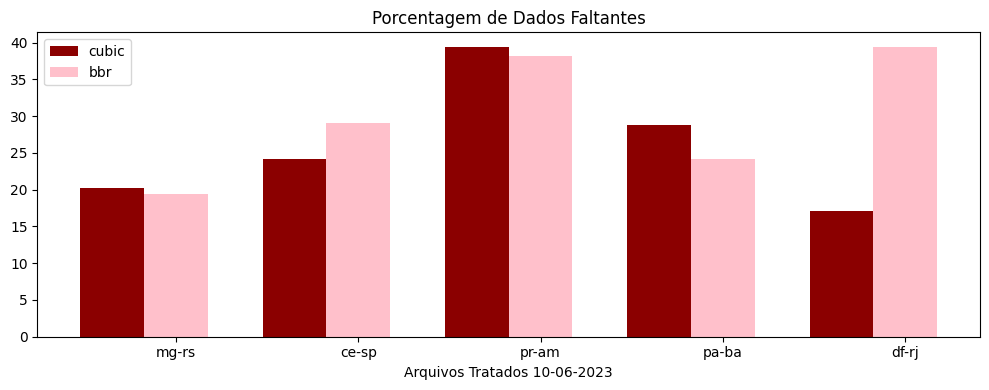

In [69]:
todas_porcentagens_tratado = {}
for pasta in os.listdir("../../datasets/vazao/10-06-2023/tratado/"):
    caminho = os.path.join("../../datasets/vazao/10-06-2023/tratado/", pasta)
    porcentagens_caminho = verificar_porcentagem_pasta(caminho)
    todas_porcentagens_tratado[pasta] = porcentagens_caminho

import re

# Extrair as informações relevantes dos nomes dos arquivos
labels = [re.search(r' esmond data (.*?) \d{2}-\d{2}-\d{4}.csv', filename).group(1) for filename in todas_porcentagens_tratado['cubic'].keys()]

# Organizar os dados
keys = list(todas_porcentagens_tratado.keys())
values = [list(todas_porcentagens_tratado[key].values()) for key in keys]

colors = ['#8B0000', 'pink'] 
# Configurar posições das barras
x = range(len(labels))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 4))
width = 0.35
for i in range(len(keys)):
    plt.bar([pos + i * width for pos in x], values[i], width=width, label=keys[i], color=colors[i])

# Configurar os rótulos do eixo x
plt.xlabel('Arquivos Tratados 10-06-2023')
plt.xticks([pos + width for pos in x], labels)

# Configurar o título e a legenda
plt.title('Porcentagem de Dados Faltantes')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

